In [8]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 11s 1us/step


In [10]:
len(X_train)

60000

In [11]:
len(y_train)

60000

In [12]:
len(X_test)

10000

In [14]:
X_train[0].shape

(28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

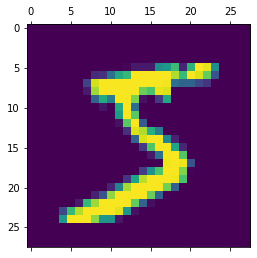

In [16]:
plt.matshow(X_train[0])

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
X_train = X_train / 255
X_test = X_test /255

In [27]:
#flatten 

X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test ),28*28)

In [28]:
X_train_flatten.shape

(60000, 784)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

model.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 759us/step - loss: 0.7206 - accuracy: 0.8143
Epoch 2/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.3063 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.2905 - accuracy: 0.9190
Epoch 4/10
1875/1875 [==============================] - 2s 845us/step - loss: 0.2709 - accuracy: 0.9233
Epoch 5/10
1875/1875 [==============================] - 1s 740us/step - loss: 0.2753 - accuracy: 0.9229
Epoch 6/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.2583 - accuracy: 0.9281
Epoch 7/10
1875/1875 [==============================] - 1s 642us/step - loss: 0.2527 - accuracy: 0.9295
Epoch 8/10
1875/1875 [==============================] - 1s 684us/step - loss: 0.2491 - accuracy: 0.9303
Epoch 9/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.2492 - accuracy: 0.9319
Epoch 10/10
1875/1875 [==============================] - 1s 628u

In [33]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 694us/step - loss: 0.2695 - accuracy: 0.9254


[0.2694736123085022, 0.9254000186920166]

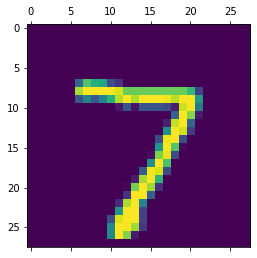

In [34]:
plt.matshow(X_test[0])

In [35]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

array([5.3845048e-03, 1.0555899e-08, 2.0212084e-02, 9.7565079e-01,
       1.2903512e-03, 1.2897870e-01, 5.2976066e-08, 9.9985683e-01,
       6.9859803e-02, 7.3468065e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[0])

7

In [37]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [42]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    6,    8,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    5,    2,   10,    0],
       [   5,    8,  930,   16,    8,    3,   15,    8,   35,    4],
       [   4,    0,   17,  925,    0,   19,    3,   10,   18,   14],
       [   1,    1,    2,    2,  901,    0,   15,    4,    7,   49],
       [  11,    2,    2,   38,    9,  767,   21,    8,   27,    7],
       [  11,    3,    6,    1,    7,    7,  921,    1,    1,    0],
       [   1,    6,   25,    6,    7,    1,    0,  939,    2,   41],
       [   9,    7,    6,   25,    8,   20,   15,   10,  857,   17],
       [  11,    7,    1,    9,   18,    5,    0,   11,    5,  942]])>

Text(69.0, 0.5, 'Truth')

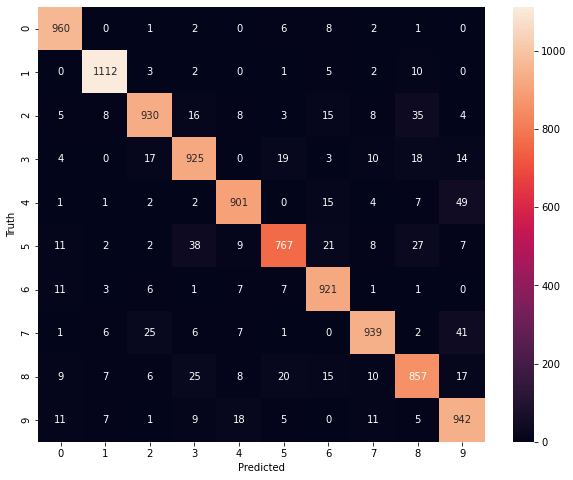

In [39]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
#now we will do the same thing using the hidden layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10 ,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

model.fit(X_train_flatten, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4660 - accuracy: 0.8677
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1349 - accuracy: 0.9613
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0496 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0393 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0317 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0255 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.0200 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 2s 907us/step - loss: 0

In [41]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 930us/step - loss: 0.0801 - accuracy: 0.9780


[0.08007913827896118, 0.9779999852180481]

Text(87.0, 0.5, 'Truth')

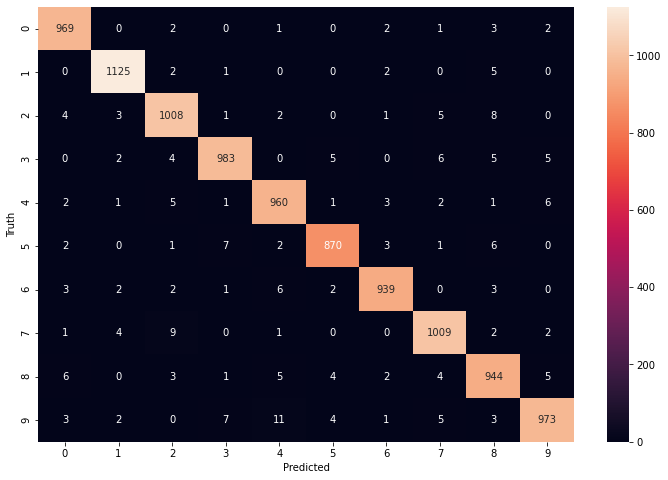

In [46]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize=(12,8))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
#if I dont want to flatten all the tiem then the procedure is given below

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.4561 - accuracy: 0.8717
Epoch 2/5
1875/1875 [==============================] - 2s 856us/step - loss: 0.1311 - accuracy: 0.9613
Epoch 3/5
1875/1875 [==============================] - 2s 858us/step - loss: 0.0898 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 871us/step - loss: 0.0658 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.0520 - accuracy: 0.9838
